# Introduction
PG1553+113 (also known as 1ES 1553+113) is a blazar at z=0.5. It was characterized in the GeV spectrum [here](https://arxiv.org/abs/0911.4252) using Fermi data. [Tramacere et al. 2007](https://www.aanda.org/articles/aa/pdf/2007/20/aa6226-06.pdf) analyzed the Swift spectrum data of 9 Bl Lac objects, including ths one. 

In [18]:
from astroquery.heasarc import Heasarc
from astroquery.simbad import Simbad
from astropy.io import fits as FITS
from astropy.time import Time
import matplotlib as mlp
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import inset_locator

import numpy as np
import pandas as pd
import requests
%matplotlib inline

# Using Astroquery
This is a python package that can query many astronomical catalogs and databases. I queried the Swift master catalog a while ago by making a custom astropy table reader, however astroquery usage is straightforward and painless :) 

First I am going to look for the object I am studying (PG1553+113) on Simbad. Then I will query HEASARC Swift mission catalog. This object is thoroughly described here https://arxiv.org/pdf/1801.03335.pdf 



In [19]:
# Lets look at simbad catalog:
result_table = Simbad.query_object("PG 1553+113")

In [20]:
result_table

MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE
,"""h:m:s""","""d:m:s""",,,mas,mas,deg,,,
object,str13,str13,int16,int16,float32,float32,int16,str1,str1,object
QSO B1553+113,15 55 43.0439,+11 11 24.365,14,14,0.019,0.019,90,A,O,2018yCat.1345....0G


In [2]:
# Astroquery can query all heasarc missions
missions = Heasarc.query_mission_list()

In [4]:
missions[0:10]

Archive,name,Table_Description
str7,str27,str80
HEASARC,a1,HEAO 1 A1 X-Ray Source Catalog
HEASARC,a1point,HEAO 1 A1 Lightcurves
HEASARC,a2lcpoint,HEAO 1 A2 Pointed Lightcurves
HEASARC,a2lcscan,HEAO 1 A2 Scanned Lightcurves
HEASARC,a2led,HEAO 1 A2 LED Catalog
HEASARC,a2pic,HEAO 1 A2 Piccinotti Catalog
HEASARC,a2point,HEAO 1 A2 Pointing Catalog
HEASARC,a2rtraw,HEAO 1 A2 Raw Rates
HEASARC,a2specback,HEAO 1 A2 Spectra Background


In [190]:
# We are interested on swift data for the object PG 1553+113, an AGN.
result_table = Heasarc.query_object("PG 1553+113", "swiftmastr", fields="All")

In [191]:
result_table = result_table.to_pandas()

In [196]:
result_table["START_TIME"] =  Time(result_table.START_TIME, format="mjd").iso
result_table["PROCESSING_DATE"] =  Time(result_table.PROCESSING_DATE, format="mjd").iso
result_table["ARCHIVE_DATE"] = Time(result_table.ARCHIVE_DATE, format="mjd").iso
result_table.sort_values("START_TIME").tail()

,NAME,OBSID,RA,DEC,START_TIME,PROCESSING_DATE,XRT_EXPOSURE,UVOT_EXPOSURE,BAT_EXPOSURE,ARCHIVE_DATE,...,UVOT_EXPO_VV,UVOT_EXPO_W1,UVOT_EXPO_W2,UVOT_EXPO_WH,XRT_EXPO_IM,XRT_EXPO_LR,XRT_EXPO_PC,XRT_EXPO_PU,XRT_EXPO_WT,SEARCH_OFFSET_
94,b'1ES1553+113 ',b'00035021038',238.88349,11.19077,2018-08-10 04:00:57.000,2018-08-20 00:00:00.000,1192.095,1142.834,1203.0,2018-08-21 00:00:00.000,...,94.552,189.535,378.561,0.0,0.0,0.0,1185.939,0.0,6.156,b' 2.700 (PG 1553+113)\n'
77,b'1ES1553+113 ',b'00035021039',238.87457,11.19127,2018-08-19 15:56:57.000,2018-08-29 00:00:00.000,1302.328,1277.227,1310.0,2018-08-30 00:00:00.000,...,106.777,213.763,427.768,0.0,0.0,0.0,1300.312,0.0,2.016,b' 3.225 (PG 1553+113)\n'
98,b'1ES1553+113 ',b'00035021040',238.90598,11.18059,2018-08-29 08:51:56.000,2018-09-08 00:00:00.000,1171.764,1145.791,1178.0,2018-09-09 00:00:00.000,...,93.769,187.714,374.777,0.0,0.0,0.0,1163.387,0.0,8.377,b' 1.489 (PG 1553+113)\n'
277,b'1ES1553+113 ',b'00035021041',238.88206,11.20303,2018-09-06 03:03:57.000,2018-09-16 00:00:00.000,342.163,325.835,348.0,2018-09-17 00:00:00.000,...,0.000,105.762,114.588,0.0,0.0,0.0,328.449,0.0,13.714,b' 2.889 (PG 1553+113)\n'
60,b'1ES1553+113 ',b'00035021043',238.95670,11.26145,2018-09-19 09:51:57.000,2018-09-19 00:00:00.000,1456.886,1431.785,1463.0,2018-09-30 00:00:00.000,...,114.775,229.761,459.775,0.0,0.0,0.0,1451.727,0.0,5.159,b' 4.574 (PG 1553+113)\n'


In [116]:
result_table.TDRSS_FLAG.value_counts()
# It seems none of these observations have TDRSS data.

b'N         '    288
Name: TDRSS_FLAG, dtype: int64

In [128]:
{
    "Total N. Observations = ": len(result_table),
    "Xrt Im mode == 0s": sum(result_table.XRT_EXPO_IM==0),
    "Photodiode Low-Rate == 0s": sum(result_table.XRT_EXPO_LR==0), 
    "Photodiode Piled-Up == 0s": sum(result_table.XRT_EXPO_PU==0)
}
# It seems there is no photodiode LR, PU data and Image data for these events (just 1 has XRT-LR data)

{'Total N. Observations = ': 288,
 'Xrt Im mode == 0s': 288,
 'Photodiode Low-Rate == 0s': 287,
 'Photodiode Piled-Up == 0s': 288}

# Observation data

The previous table is a list of observations recorded by Swift mission. Each one of these observations can be fetched from Swift archive ftp server (and other sources such as HEASARC). 

I am following this documentation, from Swift, to explore this data: https://swift.gsfc.nasa.gov/analysis/xrt_swguide_v1_2.pdf

I am focusing on the latest observation, seen on 2018-09-06, obsid = 00035021041. The data for this event can be found here: ftp://legacy.gsfc.nasa.gov/swift/data/obs/2018_09/00035021041. I am also focusing only on the x-ray instrument (xrt) for now.

In [ ]:
! wget --recursive --no-parent "ftp://legacy.gsfc.nasa.gov/swift/data/obs/2018_09/00035021041/xrt" -P "~/DATOS/Swift/" 

In [13]:
# Window timed
wtimg = FITS.open("../../../DATOS/Swift/legacy.gsfc.nasa.gov/swift/data/obs/2018_09/00035021041/xrt/products/sw00035021041xwt_sk.img.gz")
# Photon count
pcimg = FITS.open("../../../DATOS/Swift/legacy.gsfc.nasa.gov/swift/data/obs/2018_09/00035021041/xrt/products/sw00035021041xpc_sk.img.gz")

In [14]:
wtimg.info(), pcimg.info()

Filename: ../../../DATOS/Swift/legacy.gsfc.nasa.gov/swift/data/obs/2018_09/00035021041/xrt/products/sw00035021041xwt_sk.img.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     340   (1000, 1000)   int32   
  1  GTI           1 BinTableHDU     65   1R x 2C   [1D, 1D]   
Filename: ../../../DATOS/Swift/legacy.gsfc.nasa.gov/swift/data/obs/2018_09/00035021041/xrt/products/sw00035021041xpc_sk.img.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     445   (1000, 1000)   int32   
  1  GTI           1 BinTableHDU     65   1R x 2C   [1D, 1D]   
  2  SRCLIST       1 BinTableHDU    107   1R x 11C   [1E, 1E, 1E, 1E, 1E, 1D, 1D, 1E, 1E, 1E, 1E]   


(None, None)

In [15]:
print("WT Image data GTI and cols")
print(wtimg[1].data)
print(wtimg[1].columns)
print("PC Image data GTI and cols")
print(pcimg[1].data)
print(pcimg[1].columns)
print("PC Source list info")
print(pcimg[2].data)
print(pcimg[2].columns)

WT Image data GTI and cols
[(5.57896071e+08, 5.57896085e+08)]
ColDefs(
    name = 'START'; format = '1D'; unit = 's'
    name = 'STOP'; format = '1D'; unit = 's'
)
PC Image data GTI and cols
[(5.57896087e+08, 5.57896413e+08)]
ColDefs(
    name = 'START'; format = '1D'; unit = 's'
    name = 'STOP'; format = '1D'; unit = 's'
)
PC Source list info
[(1.1051989, 0.06397975, 429.1128, 479.07895, 1.01664, 238.92975069, 11.18899953, nan, 29.4664, 0., 17.274197)]
ColDefs(
    name = 'SRCRATE'; format = '1E'; unit = 'count/s'
    name = 'SRCRATE_ERR'; format = '1E'; unit = 'count/s'
    name = 'X'; format = '1E'; unit = 'pixel'
    name = 'Y'; format = '1E'; unit = 'pixel'
    name = 'VIGNET'; format = '1E'
    name = 'RA'; format = '1D'; unit = 'deg'
    name = 'DEC'; format = '1D'; unit = 'deg'
    name = 'ERRRAD'; format = '1E'; unit = 'arcsec'
    name = 'HBOXSIZE'; format = '1E'; unit = 'arcsec'
    name = 'PROB'; format = '1E'
    name = 'SNR'; format = '1E'
)


In [50]:
# When plotting the image data it was too difficult to see the actual informative points. 
# Therefore here I am looking their location to plot a window surrounding them.
wtbbox = [(min(x),max(x)) for x in np.where(wtimg[0].data>0)]
print("Bounding box for wt image: ", wtbbox)
pcbbox = [(min(x),max(x)) for x in np.where(pcimg[0].data>0)]
print("Bounding box for pc image: ", pcbbox)

Bounding box for wt image:  [(490, 510), (414, 596)]
Bounding box for pc image:  [(210, 795), (229, 805)]


/home/guillermo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
/home/guillermo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


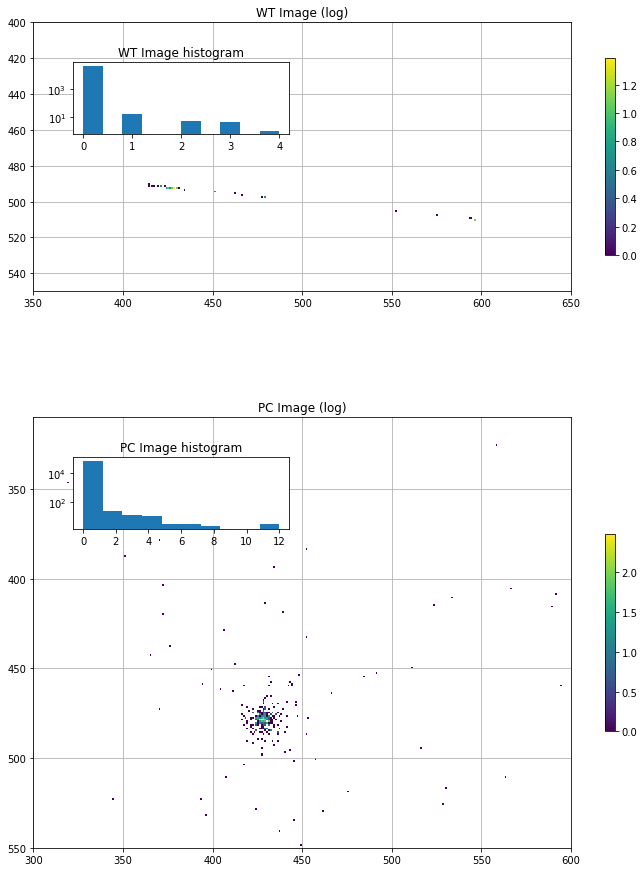

In [252]:
def plotIms(pcimg, pcbbox, wtimg, wtbbox):
    mlp.rcParams["figure.figsize"] = (10,14)
    ax = plt.subplot(2,1,1)
    plt.title("WT Image (log)")
    plt.grid()
    plt.imshow(np.log(wtimg[0].data[wtbbox[0][0]:wtbbox[0][1], wtbbox[1][0]:wtbbox[1][1]]), 
               extent =(wtbbox[1][0],wtbbox[1][1], wtbbox[0][1],wtbbox[0][0]) )
    plt.colorbar(shrink = 0.4)
    ax_mini = inset_locator. inset_axes(ax,width=3, height=1, loc= 2, borderpad = 4)
    ax_mini.set_title("WT Image histogram")
    ax_mini.hist(np.ndarray.flatten(wtimg[0].data[wtbbox[0][0]:wtbbox[0][1], wtbbox[1][0]:wtbbox[1][1]]))
    ax_mini.set_yscale("log")
    ax = plt.subplot(2,1,2)
    plt.title("PC Image (log)")
    # I am narrowing a bit the region to plot, so it looks better
    plt.grid()
    plt.imshow(np.log(pcimg[0].data[pcbbox[0][0]:pcbbox[0][1], pcbbox[1][0]:pcbbox[1][1]]),
              extent =(pcbbox[1][0],pcbbox[1][1], pcbbox[0][1],pcbbox[0][0]), 
              )
    
    plt.colorbar(shrink=0.4)
    ax_mini = inset_locator. inset_axes(ax,width=3, height=1, loc= 2, borderpad = 4)
    ax_mini.set_title("PC Image histogram")
    ax_mini.hist(np.ndarray.flatten(pcimg[0].data[pcbbox[0][0]:pcbbox[0][1], pcbbox[1][0]:pcbbox[1][1]]))
    ax_mini.set_yscale("log")
    plt.tight_layout()
plotIms(pcimg, [(310, 550), (300, 600)], wtimg, [(400, 550), (350, 650)])

## Event files

Lets read now the event file for this same observation.

In [81]:
event = FITS.open("/home/guillermo/DATOS/Swift/legacy.gsfc.nasa.gov/swift/data/obs/2018_09/00035021041/xrt/event/sw00035021041xpcw3po_cl.evt.gz")

In [82]:
event.info()

Filename: /home/guillermo/DATOS/Swift/legacy.gsfc.nasa.gov/swift/data/obs/2018_09/00035021041/xrt/event/sw00035021041xpcw3po_cl.evt.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     108   ()      
  1  EVENTS        1 BinTableHDU    493   465R x 11C   [1D, 1I, 1I, 1I, 1I, 1I, 1I, 1J, 1J, 1I, 16X]   
  2  GTI           1 BinTableHDU    106   1R x 2C   [1D, 1D]   
  3  BADPIX        1 BinTableHDU    126   220R x 6C   [1I, 1I, 1I, 1I, I, 16X]   
  4  BIASDIFF      1 BinTableHDU    153   14R x 13C   [1D, 1I, 1I, 1I, 1I, 1I, 1I, 1J, 1J, 1J, 1J, 1J, 1J]   


In [83]:
event[1].columns

ColDefs(
    name = 'TIME'; format = '1D'; unit = 's'
    name = 'X'; format = '1I'; unit = 'pixel'; null = -1; coord_type = 'RA---TAN'; coord_unit = 'deg'; coord_ref_point = 500.5; coord_ref_value = 238.8821; coord_inc = -0.0006548089
    name = 'Y'; format = '1I'; unit = 'pixel'; null = -1; coord_type = 'DEC--TAN'; coord_unit = 'deg'; coord_ref_point = 500.5; coord_ref_value = 11.20303; coord_inc = 0.0006548089
    name = 'RAWX'; format = '1I'; unit = 'pixel'; coord_type = 'RAWX'; coord_ref_point = 300.5; coord_ref_value = 299.5; coord_inc = 1
    name = 'RAWY'; format = '1I'; unit = 'pixel'; coord_type = 'RAWY'; coord_ref_point = 300.5; coord_ref_value = 299.5; coord_inc = 1
    name = 'DETX'; format = '1I'; unit = 'pixel'; coord_type = 'DETX'; coord_unit = 'mm'; coord_ref_point = 300.5; coord_ref_value = 0.0; coord_inc = 0.04
    name = 'DETY'; format = '1I'; unit = 'pixel'; coord_type = 'DETY'; coord_unit = 'mm'; coord_ref_point = 300.5; coord_ref_value = 0.0; coord_inc = 0.04
   

In [207]:
# Exploring information from the event header: 
# event[1].header[0:100]

In [86]:
# Are there pixels outside the GTI window?
# Nope. Perhaps they are in bad pixels array.
gti = event[2].data[0]
event[1].data[(event[1].data.TIME < gti[0]) & (event[1].data.TIME > gti[1])]

FITS_rec([],
         dtype=(numpy.record, [('TIME', '>f8'), ('X', '>i2'), ('Y', '>i2'), ('RAWX', '>i2'), ('RAWY', '>i2'), ('DETX', '>i2'), ('DETY', '>i2'), ('PHA', '>i4'), ('PI', '>i4'), ('GRADE', '>i2'), ('STATUS', 'u1', (2,))]))

(array([52., 48., 47., 46., 54., 38., 40., 51., 43., 46.]),
 array([5.57896087e+08, 5.57896119e+08, 5.57896151e+08, 5.57896184e+08,
        5.57896216e+08, 5.57896248e+08, 5.57896281e+08, 5.57896313e+08,
        5.57896345e+08, 5.57896378e+08, 5.57896410e+08]),
 <a list of 10 Patch objects>)

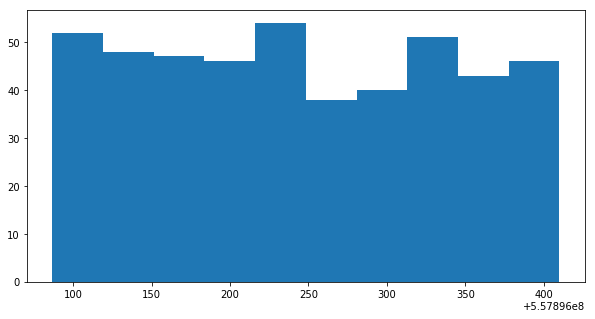

In [89]:
# Let's see the distr of the time. This time is given in seconds. 
# Note the window timed event lasts ~400s =  6.7 minutes, and the pixels are detected
# kind of uniformly during the event.
mlp.rcParams["figure.figsize"] = (10,5)
plt.hist([datum[0] for datum in event[1].data])

Text(0.5,0,'E_KeV = PI/100')

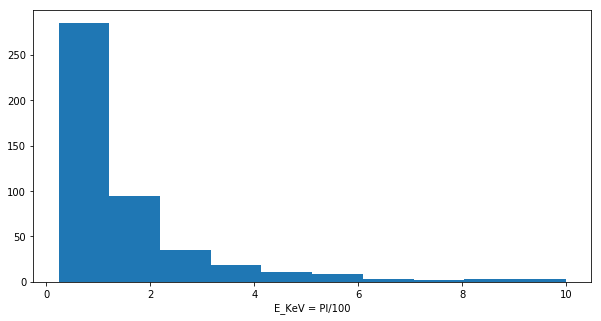

In [95]:
# Let's see the distr of the time. This time is given in seconds. 
# Note the window timed event lasts ~400s =  6.7 minutes, and the pixels are detected
# kind of uniformly during the event.
mlp.rcParams["figure.figsize"] = (10,5)
plt.hist(event[1].data.PI/100)
plt.xlabel("E_KeV = PI/100")

In [70]:
# Columns in the bad pixel table. This is described in the docs.
event[3].columns

ColDefs(
    name = 'RAWX'; format = '1I'; unit = 'pixel'
    name = 'RAWY'; format = '1I'; unit = 'pixel'
    name = 'Amp'; format = '1I'
    name = 'TYPE'; format = '1I'
    name = 'YEXTENT'; format = 'I'
    name = 'BADFLAG'; format = '16X'
)

In [130]:
eventData = event[1].data

In [131]:
eventData = pd.DataFrame(data = eventData.tolist(), columns = eventData.names)

Text(0.5,1,'Photon counter event plot of Pulse Invariant values')

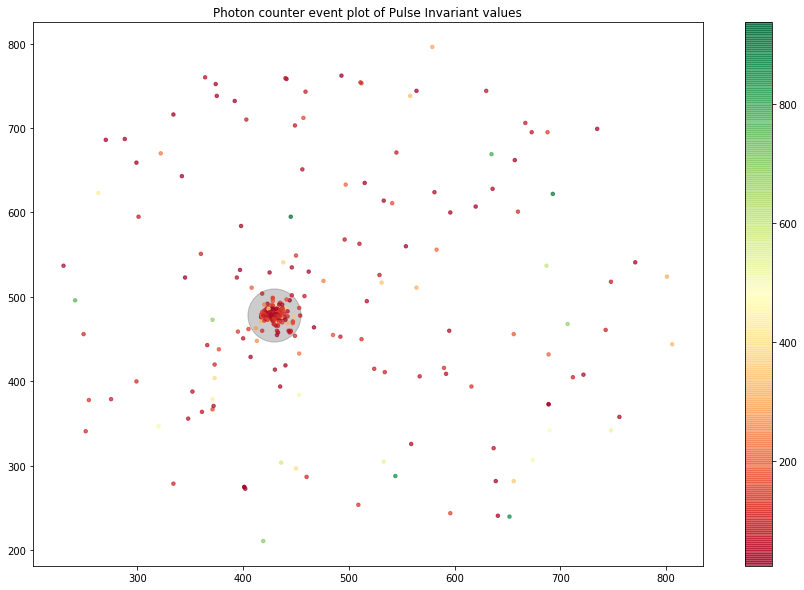

In [139]:
mlp.rcParams["figure.figsize"] = (15,10)
eventData = eventData[eventData.PI < 999]
plt.scatter(429.1128, 479.0789, 3.14 * 50**2, "black", alpha = 0.2)
plt.scatter(eventData.X, eventData.Y, 12, 
            c = eventData.PI, cmap="RdYlGn", alpha = 0.7 )
plt.colorbar()
plt.title("Photon counter event plot of Pulse Invariant values")

In [159]:
objectCoords = (429.1128, 479.0789)
eventData["within30"] = \
    np.sqrt((eventData.X-objectCoords[0])**2 + (eventData.Y-objectCoords[1])**2) < 30

/home/guillermo/.local/lib/python3.6/site-packages/pandas/core/indexes/category.py:148: RuntimeWarning: Values and categories have different dtypes. Did you mean to use
'Categorical.from_codes(codes, categories)'?
  dtype=dtype)
/home/guillermo/.local/lib/python3.6/site-packages/pandas/core/indexes/category.py:148: RuntimeWarning: None of the categories were found in values. Did you mean to use
'Categorical.from_codes(codes, categories)'?
  dtype=dtype)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f34b7ca1a58>,
      dtype=object)

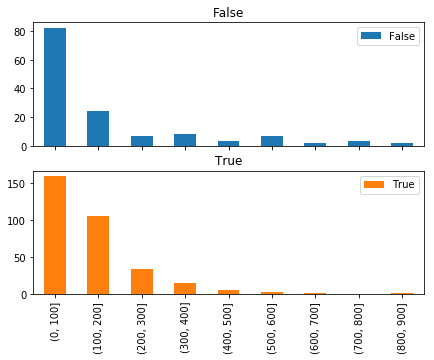

In [183]:
mlp.rcParams["figure.figsize"] = (7,5)
hists = eventData.groupby("within30").PI.apply(lambda x: pd.cut(x, list(range(0,1000,100))).value_counts()).unstack(0)
hists.plot.bar(subplots=True)
# Histograms of pixels within 30 pixels of the object center" and pixels outside the region

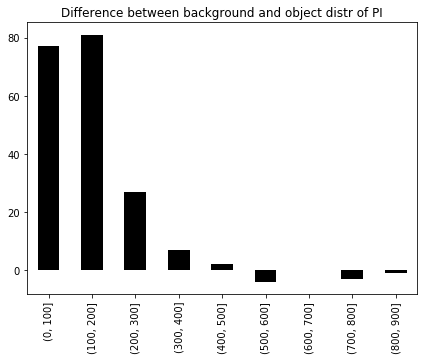

In [181]:
(hists[True] - hists[False]).plot.bar(color="black", title="Difference between background and object distr of PI")

# Reproducing Tramacere et al. 2007 graphs

In [201]:
result_table[result_table.START_TIME.apply(lambda x: x[0:10] in ["2005-04-20", "2005-10-06", "2005-10-07", "2005-10-08"] ) ]
#.isin(["2005-04-20", "2005-10-06", "2005-10-07"])]

,NAME,OBSID,RA,DEC,START_TIME,PROCESSING_DATE,XRT_EXPOSURE,UVOT_EXPOSURE,BAT_EXPOSURE,ARCHIVE_DATE,...,UVOT_EXPO_VV,UVOT_EXPO_W1,UVOT_EXPO_W2,UVOT_EXPO_WH,XRT_EXPO_IM,XRT_EXPO_LR,XRT_EXPO_PC,XRT_EXPO_PU,XRT_EXPO_WT,SEARCH_OFFSET_
0,b'1ES1553+113 ',b'00035021002',238.92167,11.20824,2005-10-06 01:28:01.000,2015-01-21 00:00:00.000,10799.454,10479.905,10594.0,2005-10-17 00:00:00.000,...,931.796,1717.770,3750.762,0.0,0.0,0.000,8560.114,0.0,2239.340,b' 1.178 (PG 1553+113)\n'
1,b'1ES1553+113 ',b'00035021003',238.91203,11.21752,2005-10-08 00:06:02.000,2015-01-21 00:00:00.000,10713.489,10446.983,10185.0,2005-10-19 00:00:00.000,...,889.507,1778.451,3693.645,0.0,0.0,0.000,9124.084,0.0,1589.405,b' 1.935 (PG 1553+113)\n'
2,b'1ES1553+113 ',b'00035021001',238.96771,11.18599,2005-04-20 03:37:01.000,2014-10-18 00:00:00.000,5224.510,5065.049,5322.0,2005-05-01 00:00:00.000,...,432.612,872.605,1740.642,0.0,0.0,8.078,5187.557,0.0,28.875,b' 2.272 (PG 1553+113)\n'


Tramacere et al 2007 paper analyses events from the dates Apr 20, Oct 06, Oct 07, year 2005. However, I couldn't find the Oct 07 event, but I found one in the following day. 

|Date   |Observation ID   |
|:------|----------------:|
| 2005 Apr 06 | ObsID = 00035021001 |
| 2005 Oct 06 | ObsID = 00035021002 |
| 2005 Oct 08 | ObsID = 00035021003 |

In [ ]:
! wget --recursive --no-parent "ftp://legacy.gsfc.nasa.gov/swift/data/obs/2005_04/00035021001/xrt" -P "../../../DATOS/Swift/" 

In [ ]:
! wget --recursive --no-parent "ftp://legacy.gsfc.nasa.gov/swift/data/obs/2005_10/00035021002/xrt" -P "../../../DATOS/Swift/" 

In [ ]:
! wget --recursive --no-parent "ftp://legacy.gsfc.nasa.gov/swift/data/obs/2005_10/00035021003/xrt" -P "../../../DATOS/Swift/" 

In [237]:
# Reading Photon count data from apr 06 2005
apr06pc = FITS.open("/home/guillermo/DATOS/Swift/legacy.gsfc.nasa.gov/swift/data/obs/2005_04/00035021001/xrt/event/sw00035021001xpcw4po_cl.evt.gz")
apr06impc = FITS.open("/home/guillermo/DATOS/Swift/legacy.gsfc.nasa.gov/swift/data/obs/2005_04/00035021001/xrt/products/sw00035021001xpc_sk.img.gz")
apr06imwt = FITS.open("/home/guillermo/DATOS/Swift/legacy.gsfc.nasa.gov/swift/data/obs/2005_04/00035021001/xrt/products/sw00035021001xwt_sk.img.gz")

In [212]:
apr06pc.info()

Filename: /home/guillermo/DATOS/Swift/legacy.gsfc.nasa.gov/swift/data/obs/2005_04/00035021001/xrt/event/sw00035021001xpcw4po_cl.evt.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     108   ()      
  1  EVENTS        1 BinTableHDU    489   9986R x 11C   [1D, 1I, 1I, 1I, 1I, 1I, 1I, 1J, 1J, 1I, 16X]   
  2  GTI           1 BinTableHDU    105   6R x 2C   [1D, 1D]   
  3  BADPIX        1 BinTableHDU    125   269R x 6C   [1I, 1I, 1I, 1I, I, 16X]   
  4  BIASDIFF      1 BinTableHDU    152   277R x 13C   [1D, 1I, 1I, 1I, 1I, 1I, 1I, 1J, 1J, 1J, 1J, 1J, 1J]   


In [285]:
apr06impc[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   32 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 1000 / length of data axis 1                          
NAXIS2  =                 1000 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
HDUCLASS= 'ogip    '           / Format conforms to OGIP/GSFC conventions       
HDUCLAS1= 'IMAGE   '           / Extension contains an image                    
TIMESYS = 'TT      '           / time system                                    
MJDREFI =                51910 / MJD reference day 01 Jan 2001 00:00:00         
MJDREFF =        0.000742870

In [290]:
def convert_radec_to_pixels(impc, ra, dec):
    ra0, rat, x0 = (impc[0].header["CRVAL1"], impc[0].header["CDELT1"], impc[0].header["CRPIX1"])
    dec0, dect, y0 = (impc[0].header["CRVAL2"], impc[0].header["CDELT2"], impc[0].header["CRPIX2"])
    return ((ra-ra0)/rat + x0, (dec-dec0)/dect + y0)
print("Object coordinates: ", apr06impc[0].header["DEC_OBJ"], apr06impc[0].header["RA_OBJ"])
apr06_obj_coords = convert_radec_to_pixels(apr06impc, apr06impc[0].header["RA_OBJ"], apr06impc[0].header["DEC_OBJ"])
print("Object pixel coords: ", apr06_obj_coords)

Object coordinates:  11.190111 238.929167
Object pixel coords:  (559.3461763424428, 506.79343920035234)


/home/guillermo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
/home/guillermo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


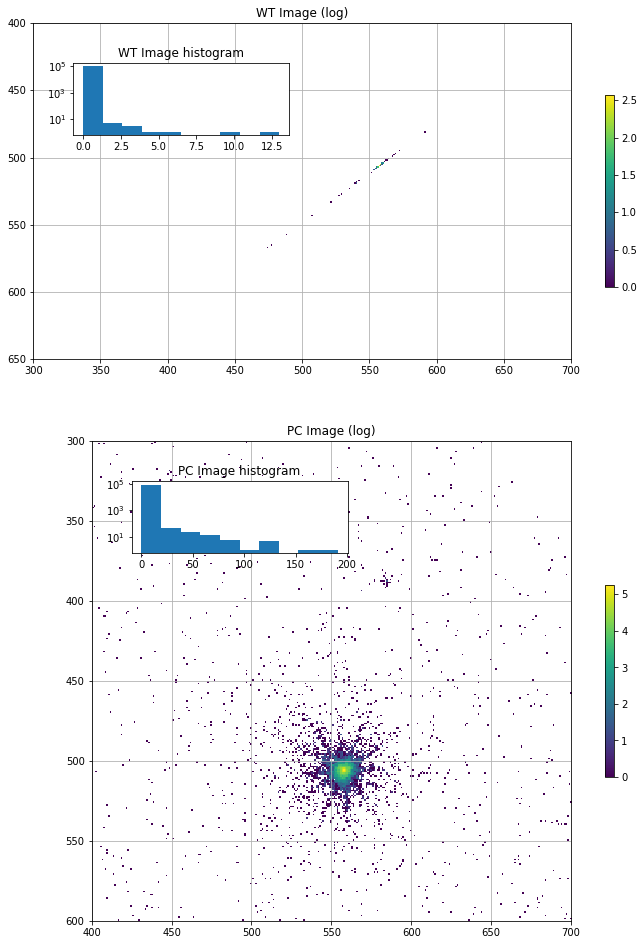

In [255]:
plotIms(apr06impc, [(300,600), (400,700)], apr06imwt, [(400,650), (300,700)])

In [222]:
# There are 6 intervals of good times... odd (?)
apr06pc_ev = pd.DataFrame(data = apr06pc[1].data.tolist(), columns = apr06pc[1].data.names)

Text(0.5,1,'Photon counter event plot of Pulse Invariant values')

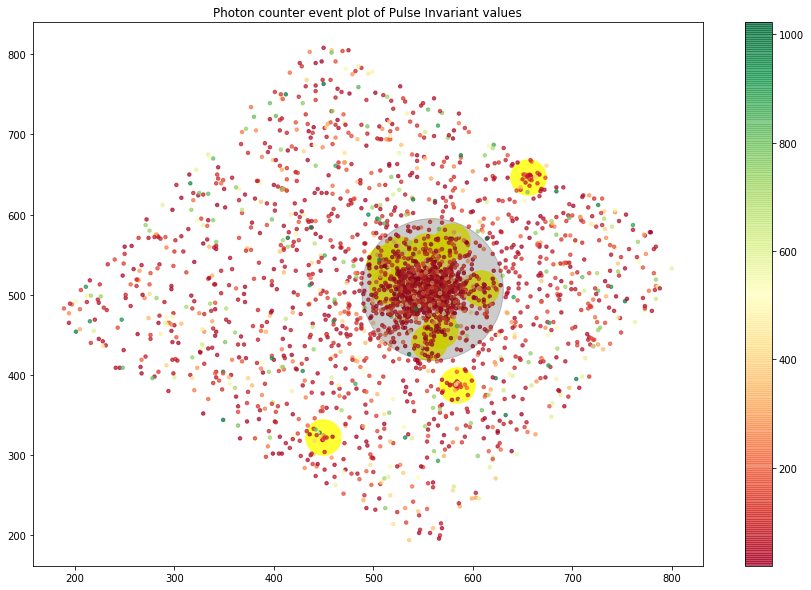

In [302]:
mlp.rcParams["figure.figsize"] = (15,10)
plt.scatter(apr06impc[2].data.X, apr06impc[2].data.Y, 3.14 * 20**2, "yellow", alpha = 0.8, label="Sources")
plt.scatter(apr06pc_ev.X, apr06pc_ev.Y, 12, 
            c = apr06pc_ev.PI, cmap="RdYlGn", alpha = 0.7 )
plt.colorbar()
plt.scatter(apr06_obj_coords[0], apr06_obj_coords[1], 3.14 * 80**2, "black", alpha = 0.2, label="Object")
plt.title("Photon counter event plot of Pulse Invariant values")

/home/guillermo/.local/lib/python3.6/site-packages/pandas/core/indexes/category.py:148: RuntimeWarning: Values and categories have different dtypes. Did you mean to use
'Categorical.from_codes(codes, categories)'?
  dtype=dtype)
/home/guillermo/.local/lib/python3.6/site-packages/pandas/core/indexes/category.py:148: RuntimeWarning: None of the categories were found in values. Did you mean to use
'Categorical.from_codes(codes, categories)'?
  dtype=dtype)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f34b3122d68>,
      dtype=object)

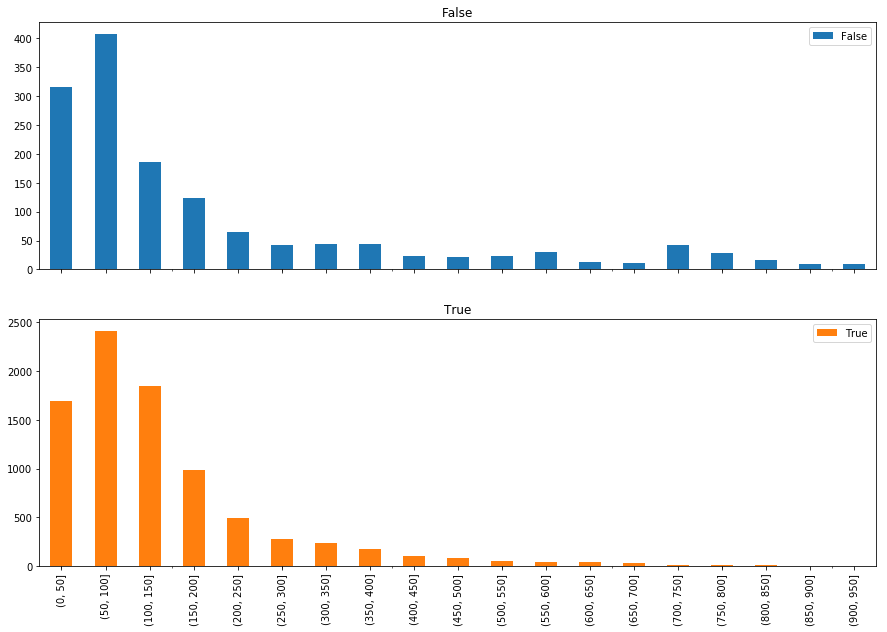

In [303]:
objradius = 80
hists = apr06pc_ev.groupby(np.sqrt((apr06pc_ev.X-apr06_obj_coords[0])**2 + (apr06pc_ev.Y-apr06_obj_coords[1])**2) < objradius)\
    .PI.apply(lambda x: pd.cut(x, list(range(0,1000,50))).value_counts()).unstack(0)
hists.plot.bar(subplots=True)
# Histograms of pixels within 30 pixels of the object center" and pixels outside the region

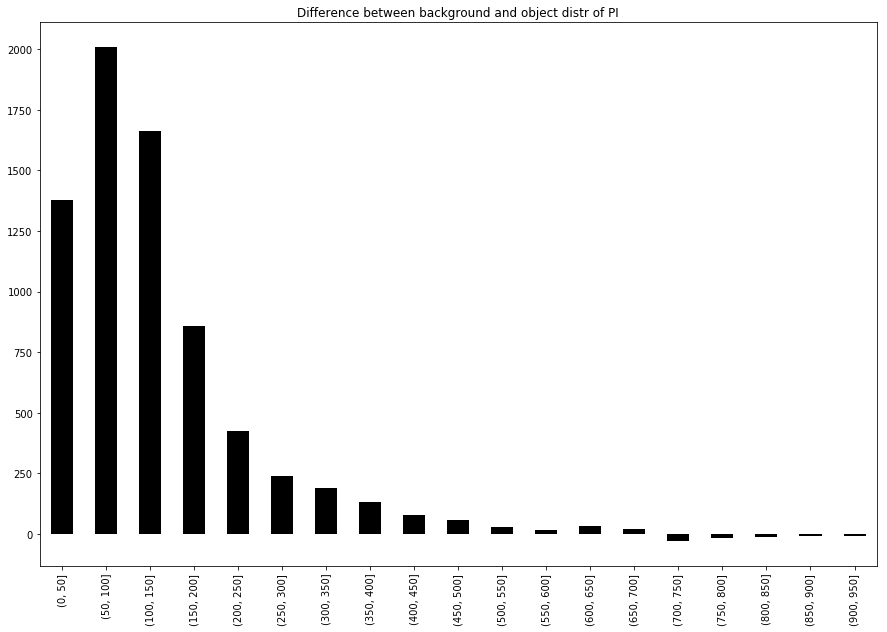

In [304]:
(hists[True] - hists[False]).plot.bar(color="black", title="Difference between background and object distr of PI")